<a href="https://www.kaggle.com/code/shigeokitamura/spearman-s-rank-correlation-test?scriptVersionId=220394403" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv


In [2]:
data = pd.read_csv('/kaggle/input/the-boston-houseprice-data/boston.csv')

# Data Exploration and Cleaning

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data = data.dropna()

In [8]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Feature Selection for Analysis and Perform Spearman's Rank Correlation

## **CRIM** (per capita crime rate) vs. **MEDV** (median value of owner-occupied homes).

In [10]:
from scipy.stats import spearmanr

correlation, p_value = spearmanr(data['CRIM'], data['MEDV'])

print(f"Spearman's rank correlation: {correlation}")
print(f"P-value: {p_value}")

Spearman's rank correlation: -0.5588909488368801
P-value: 6.553335889228178e-43


* We can see there is a meaningful inverse relationship between CRIM and MEDV. As crime rates increase, the median value of homes tends to decrease, and vice versa.
* We can aso see the P-Value is very small meaning we can confidently reject the null hypothesis and say there is a correlation between CRIM and MEDV.
* Since the Spearman is -0.55 it's considerate moderate (±0.3 to ±0.6: Moderate).

## **TAX** (Property Tax Rate) vs. **PTRATIO** (Pupil-Teacher Ratio):

In [11]:
correlation, p_value = spearmanr(data['TAX'], data['PTRATIO'])

print(f"Spearman's rank correlation: {correlation}")
print(f"P-value: {p_value}")

Spearman's rank correlation: 0.4533454597876762
P-value: 5.1456606272528265e-27


* The RHO is extremely small and much smaller than any common significance threshold, this means the observed correlation is highly unlikely to be due to random chance. You can confidently reject the null hypothesis, which suggests no correlation between TAX and PTRATIO.
* The Spearman's rank correlation coefficient (𝜌=0.4533 ρ=0.4533) is positive, meaning as TAX increases, PTRATIO tends to increase as well.
* Since the Spearman is 0.45 it's considerate moderate (±0.3 to ±0.6: Moderate).

## **RM** (average number of rooms per dwelling) vs. **LSTAT** (percentage of lower-status population).

In [12]:
from scipy.stats import spearmanr

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(data['RM'], data['LSTAT'])

print(f"Spearman's rank correlation: {correlation}")
print(f"P-value: {p_value}")

Spearman's rank correlation: -0.64083155697968
P-value: 7.478416968302503e-60


Since rho is -0.64, there is an negative correlation between RM and LSTAT.
This means that as the average number of rooms per dwelling increases, the percentage of lower-status population tends to decrease, and vice-versa.

And since p-value is lower than 0.05, the relationship between RM and LSTAT is statistically signifficant.

## **ZN** (proportion of residential land zoned for lots over 25,000 sq.ft.) vs. **INDUS** (proportion of non-retail business acres per town)

In [13]:
from scipy.stats import spearmanr

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(data['ZN'], data['INDUS'])

print(f"Spearman's rank correlation: {correlation}")
print(f"P-value: {p_value}")

Spearman's rank correlation: -0.6428105969608291
P-value: 2.5101714463792257e-60


Since rho is -0.64, there is an negative correlation between ZN and INDUS.

And since p-value is lower than 0.05, the relationship between ZN and INDUS is statistically signifficant.

# Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

## **CRIM** (per capita crime rate) vs. **MEDV** (median value of owner-occupied homes).

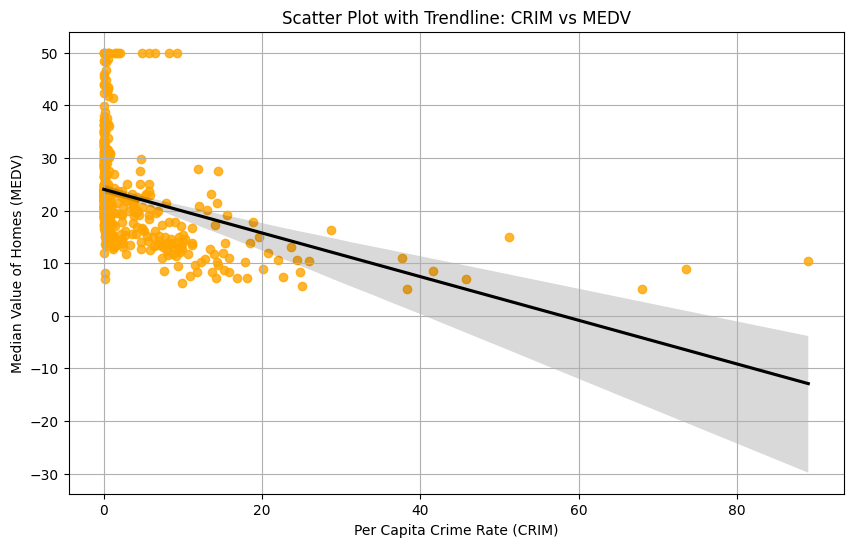

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x="CRIM", y="MEDV", scatter_kws={'color': 'orange'}, line_kws={'color': 'black'})
plt.title("Scatter Plot with Trendline: CRIM vs MEDV")
plt.xlabel("Per Capita Crime Rate (CRIM)")
plt.ylabel("Median Value of Homes (MEDV)")
plt.grid(True)
plt.show()

## **TAX** (Property Tax Rate) vs. **PTRATIO** (Pupil-Teacher Ratio):

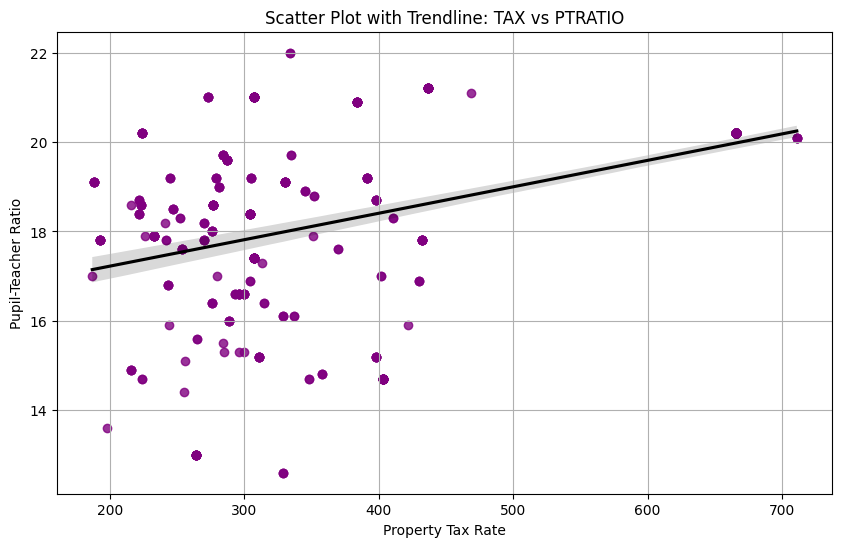

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x="TAX", y="PTRATIO", scatter_kws={'color': 'purple'}, line_kws={'color': 'black'})
plt.title("Scatter Plot with Trendline: TAX vs PTRATIO")
plt.xlabel("Property Tax Rate")
plt.ylabel("Pupil-Teacher Ratio")
plt.grid(True)
plt.show()

## **RM** (average number of rooms per dwelling) vs. **LSTAT** (percentage of lower-status population).

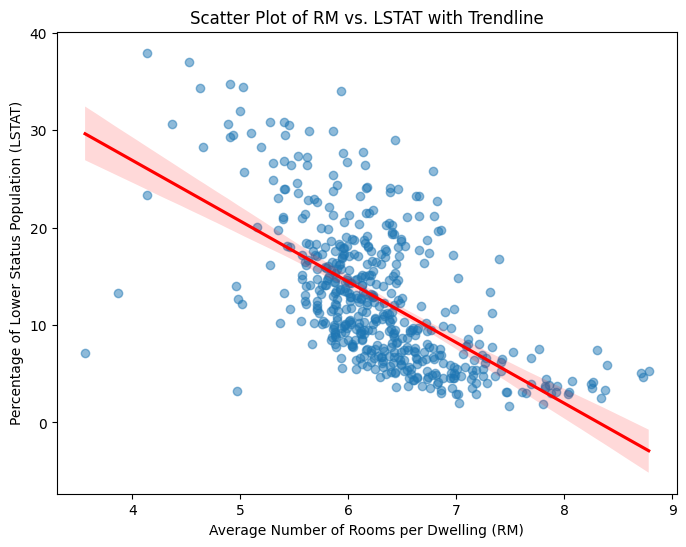

In [17]:
plt.figure(figsize=(8, 6))
sns.regplot(x='RM', y='LSTAT', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot of RM vs. LSTAT with Trendline')
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Percentage of Lower Status Population (LSTAT)')
plt.show()

## **ZN** (proportion of residential land zoned for lots over 25,000 sq.ft.) vs. **INDUS** (proportion of non-retail business acres per town)

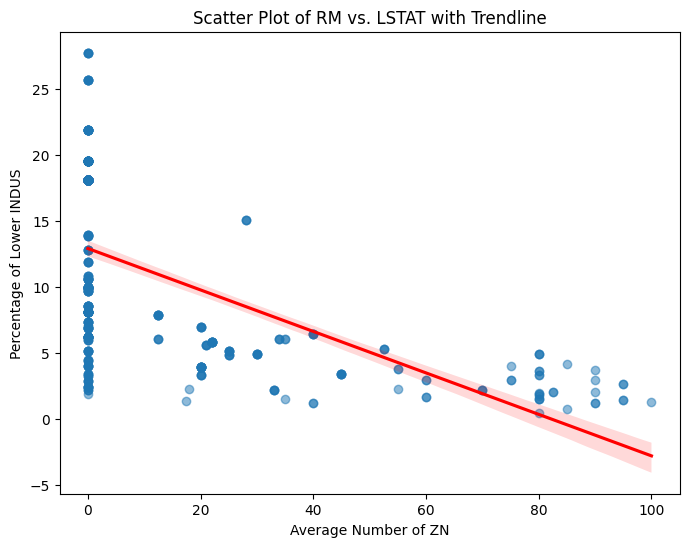

In [18]:
plt.figure(figsize=(8, 6))
sns.regplot(x='ZN', y='INDUS', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot of RM vs. LSTAT with Trendline')
plt.xlabel('Average Number of ZN')
plt.ylabel('Percentage of Lower INDUS')
plt.show()

## Heatmap of Spearman correlation matrix

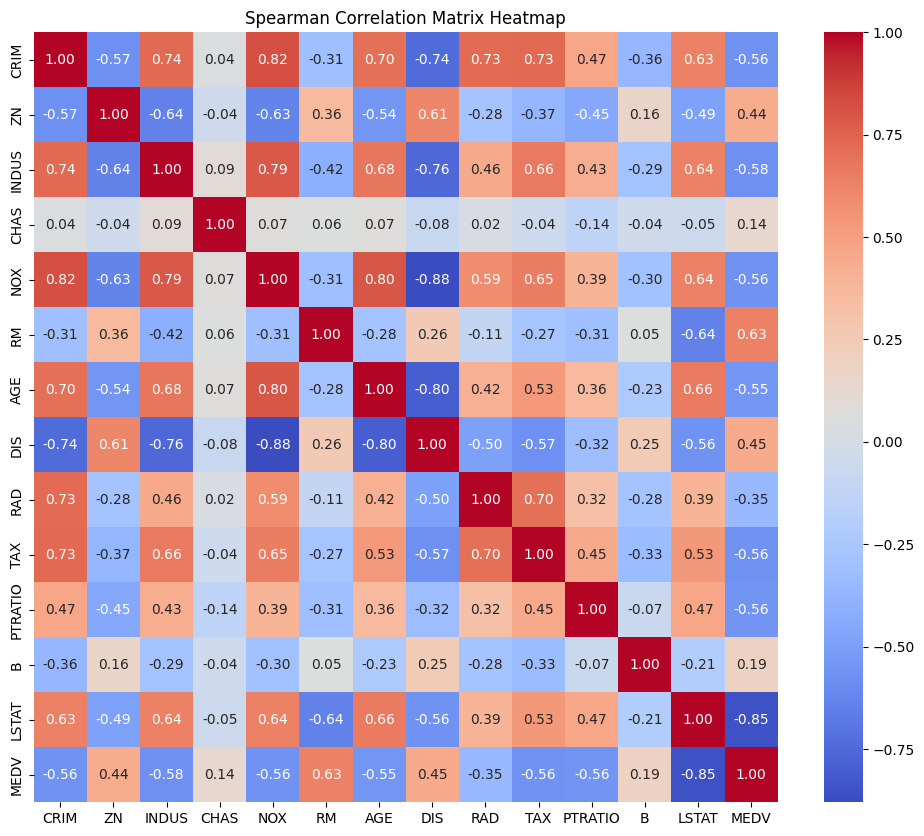

In [19]:
correlation_matrix = data.corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

# Insights
* CRIM (per capita crime rate) vs. MEDV (median value of
owner-occupied homes).
  * The data indicates that whenever the crime rates are higher the cost of living in the area is cheaper and vice-versa.

* RM (average number of rooms per dwelling) vs. LSTAT (percentage of lower-status population).
  * As the average number of rooms per dwelling increases, the percentage of lower-status population tends to decrease, and vice-versa.

* ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) vs. INDUS (proportion of non-retail business acres per town)
  * Residential areas zoned for larger parcels (higher ZN) tend to be farther from commercial and industrial areas (lower INDUS). This could be due to zoning regulations, land use planning, or simply the preferences of residents and businesses.
|
* TAX (Property Tax Rate) vs. PTRATIO (Pupil-Teacher Ratio):
  * The relationship between TAX and PTRATIO is moderately positive and statistically significant, meaning areas with higher property tax rates tend to have higher pupil-teacher ratios, which might suggest better-funded schools, though other factors could also influence this relationship.